<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">5. Carga y analisis de datos EEG</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

## Seleccionar que tipo de ejecucion se va a realizar:

## AUTOMATICA o MANUAL (por defecto AUTOMATICA).

In [12]:
# escribir entre parentesis AUTOMATICA o MANUAL

EJECUCION = "AUTOMATICA"

In [13]:
# en esta celda no ha de ser modificada 

if EJECUCION == "MANUAL":
    
    %run 3.Importaciones.ipynb
    %run 4.VariablesClases.ipynb
    dataframe_total = pd.read_csv('../datos/datosEEGTotal.csv', sep=';')


### Importo los datos del CSV aportado para la realización del TFG

In [14]:
display(HTML(html_h4('Realizo la importación de los datos del archivo en formato csv un Dataframe y los imprimo por pantalla: ','blue')))
datosEEGTotal_csv = dataframe_total
display(datosEEGTotal_csv)

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Signal,Key
0,54127,84,48,25253,14225,3441,4172,1881,9630,6863,5745,0,LButton
1,55056,78,60,4946,5021,8879,13002,879,6367,4314,3150,0,NaN
2,56038,66,75,102896,14838,12817,8565,2890,14525,9144,23072,0,NaN
3,57043,61,87,57763,12541,6173,5120,3238,10192,9048,6663,0,NaN
4,58203,37,84,21560,74162,11297,9217,4844,1945,2644,1678,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,348567,81,37,4088,13782,756,5536,7114,24230,12942,14061,0,Right
722,355018,84,20,3490,13947,2299,2051,3315,22789,17542,9966,0,Right
723,358034,84,38,3619,8525,5623,6665,5345,31352,22837,12553,0,Right
724,361108,83,51,116972,5464,1405,6395,2285,7186,5351,1219,0,Right


In [15]:
display(HTML(html_h4('Se identifica al final de la impresion del conjunto de datos el numero filas (instancias) y columnas(caracteriscticas y targets),paso a describir que representa cada una de ellas: ','blue')))
display(datosEEGTotal_csv.columns)

Index(['Timestamp', 'Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha',
       'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma', 'Signal',
       'Key'],
      dtype='object')

### Analizo cada una de las caracteristicas de los datos 

In [16]:
#https://neuroscenter.com/neurofeedback/ondas-cerebrales/
display(HTML(html_h5('Timestamp:    Deberia ser un registro de tiempo para los experimentos', 'blue')))

display(HTML(html_h5('Attention:    Podría registrar el grado de atención del que realiza el experimento ', 'black')))

display(HTML(html_h5('Meditation:   Grado de calma que tendria el individuo.', 'blue')))

display(HTML(html_h5('Delta:    Son ondas de baja frecuencia (1 y 4 Hz), están presentes en etapas de sueño profundo, durante una meditacion profunda y en paciences con lesiones cerebrales o con TDAH severo', 'black')))

display(HTML(html_h5('Theta:    Ondas entre 4 y 8 Hz, se encuentran en estados de calma profunda y sueño R.E.M., están ligadas al aprendizaje, memoria y intuición. ', 'blue')))

display(HTML(html_h5('Alpha:    Ondas entre 8 y 12 Hz, representan un estado poca actividad cereblar y se asocian a un estado de calma mental. ', 'black')))

display(HTML(html_h5('Beta:    Se diferencian LowBeta y HighBeta, su frecuencia esta entre 12 y 35Hz, asociadas auna alta actividad mental', 'blue')))

display(HTML(html_h5('Gamma:    En los datos diferencian LowGamma y HighGamma, son ondas por encima de 30Hz y suelen aparecer cuando hay una alta concentración o atención ', 'black')))

display(HTML(html_h5('Signal:    Podria ser la señal de que aporta la interfaz BCI', 'blue')))

display(HTML(html_h5('Key:    Valores target de lo que el individuo veia o debia pulsar', 'black')))


'__________________________________________________________'

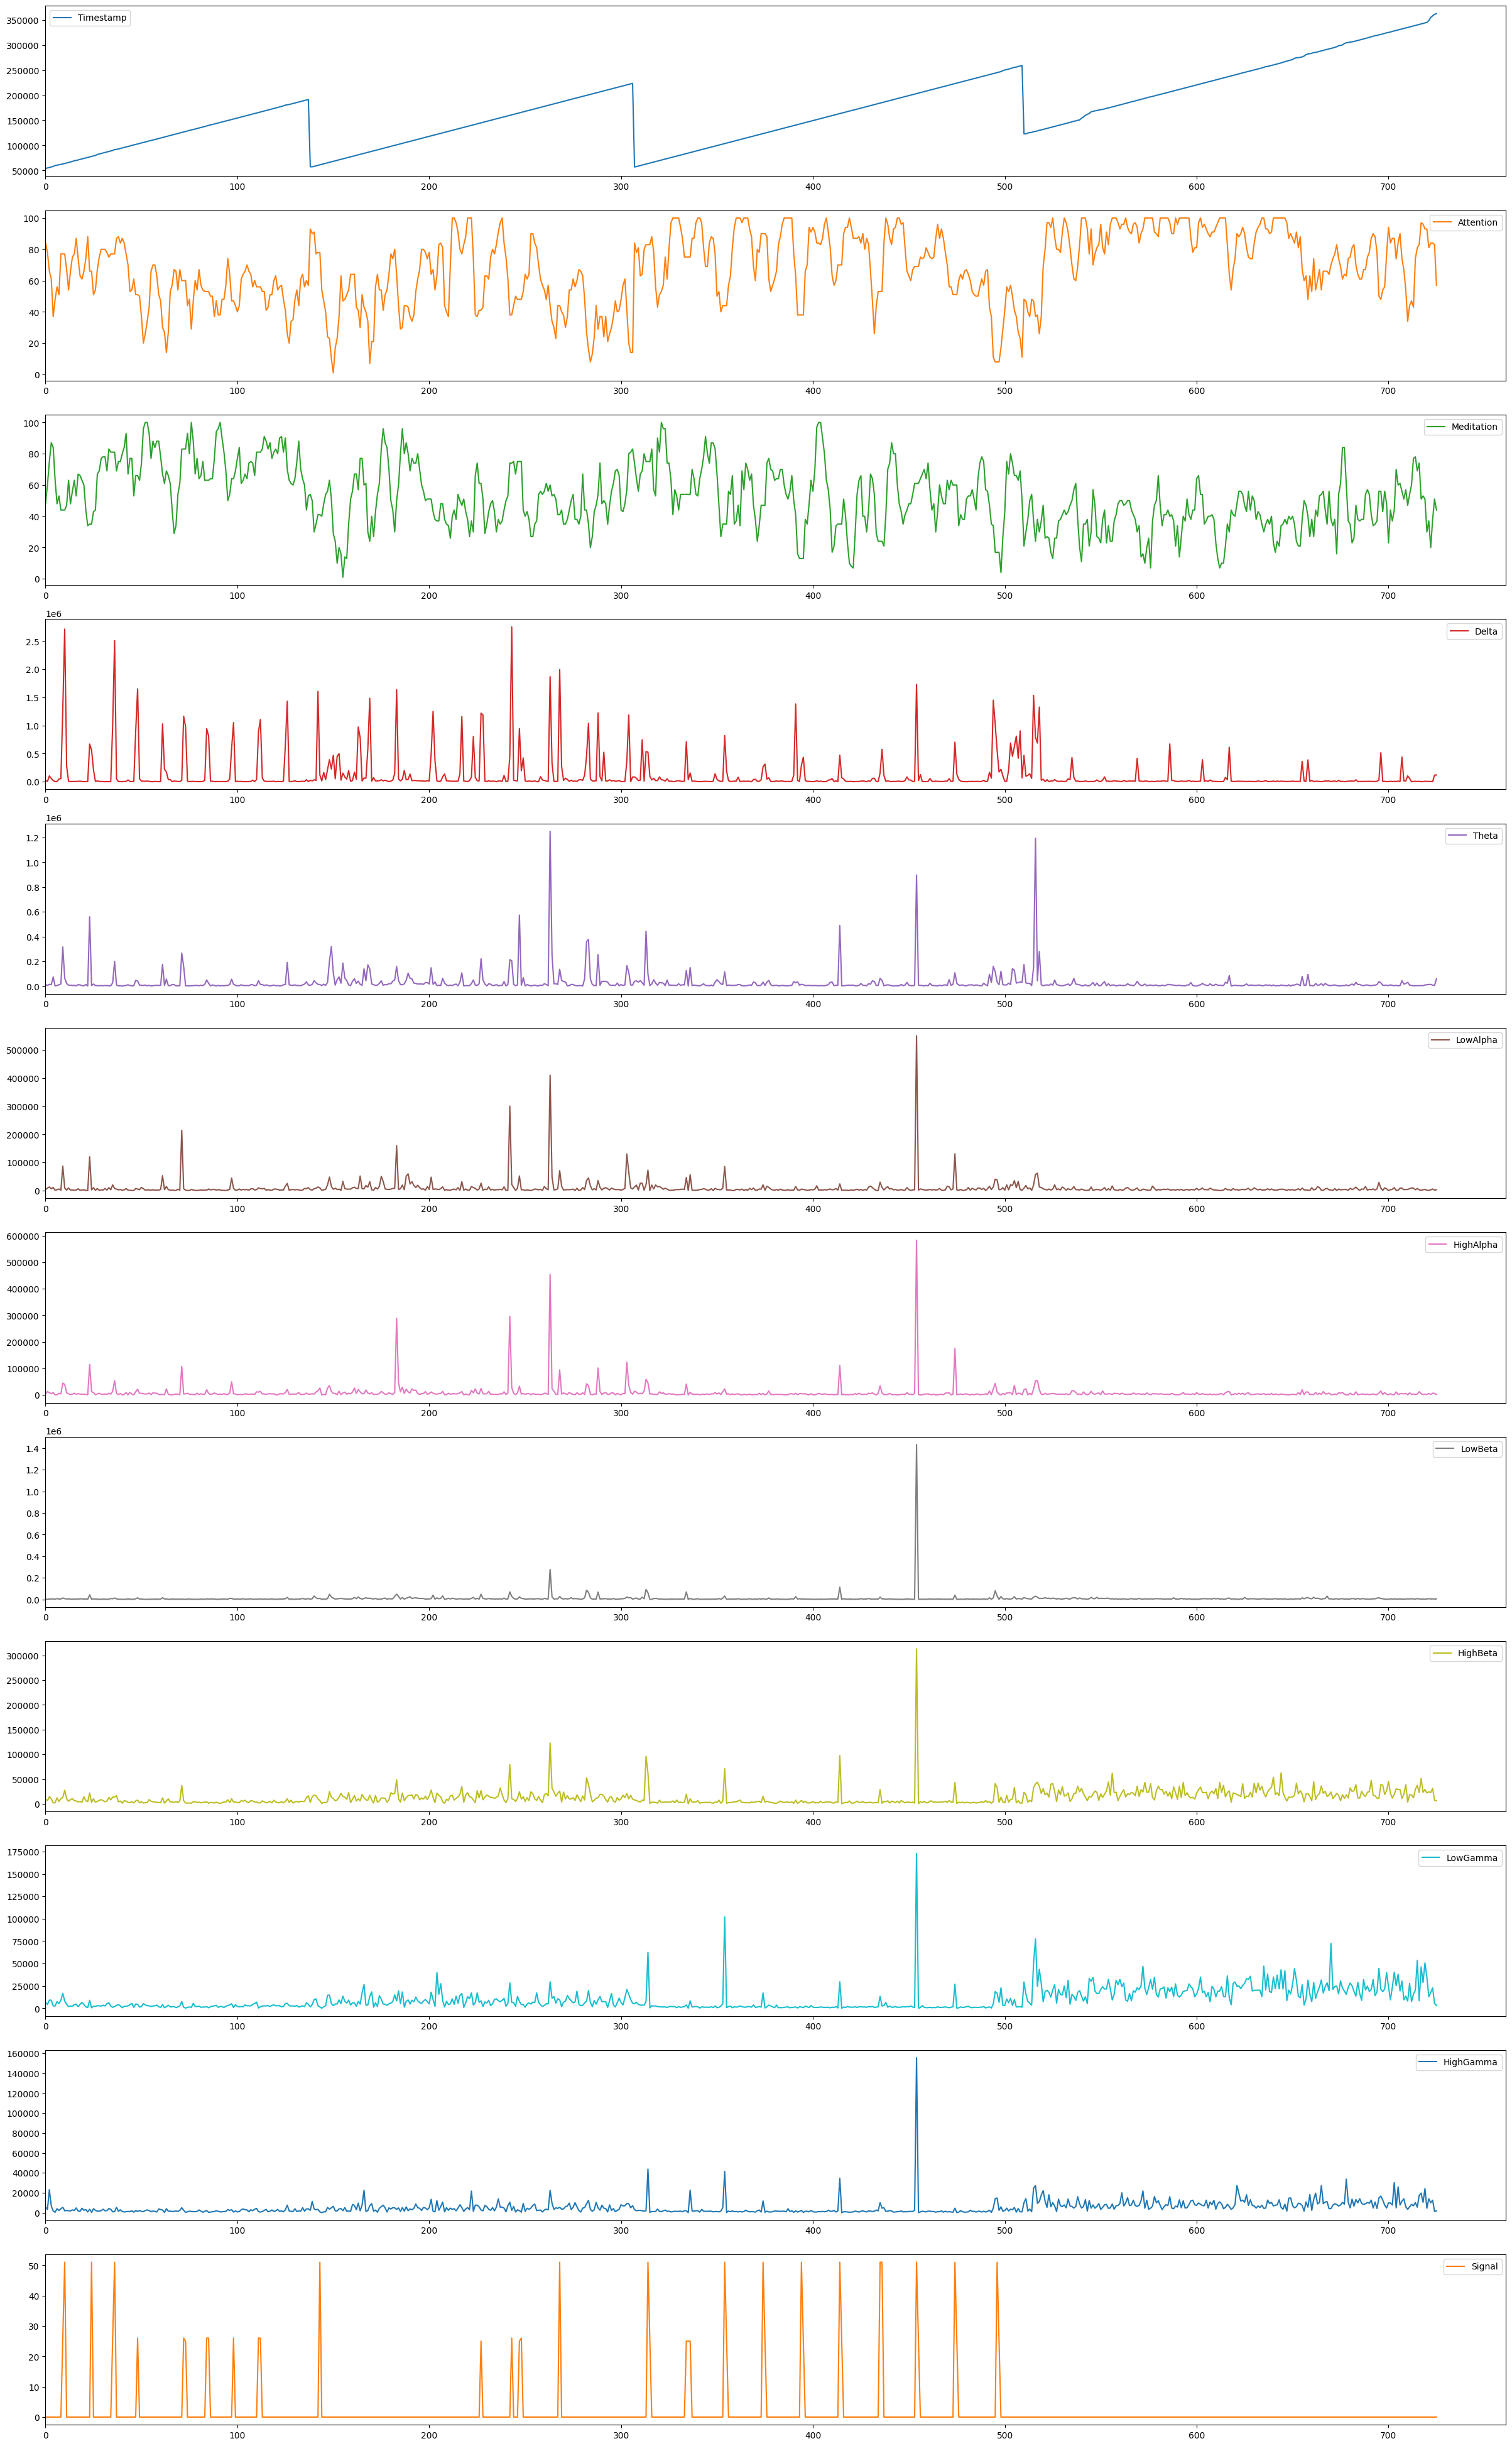

In [20]:
display('__________________________________________________________')
display(HTML(html_h4('Imprimo cada una de las caracteristicas de los datos excepto datos target: ', 'purple')))

#imprimo los datos por cada columna excluyendo Key
datosEEGTotal_csv.drop(['Key'],axis=1).plot(kind="line",subplots=True,sharex=False, figsize=(30,50),xlim=0)
plt.show()

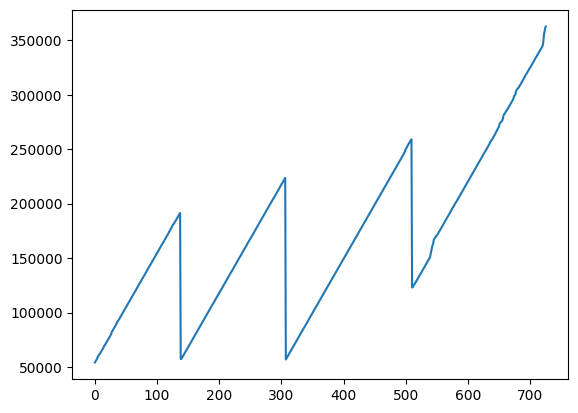

In [21]:
display(HTML(html_h4('Se aprecia que los datos de la carcteristica Timestamp reflejan varios experimentos que se solapan en el tiempo ', 'purple')))
datosEEGTotal_csv["Timestamp"].plot()
plt.show()

Imprimo los rangos de los datos y los tipos de datos

In [29]:
# rangos de datos de cada característica del dataframe
rangos_de_datos = datosEEGTotal_csv.describe()

display(HTML(html_h4('Analizo la infoormacion de datos de cada característica del conjunto de datos  ', 'black')))
datosEEGTotal_csv.info()
display(HTML(html_h5('Se observa que todos los datos son int64 excepto Key que es dtype object', 'blue')))
display(HTML(html_h5('En Key (valor target) hay 213 datos perdidos en comparacion con el resto de caracteristicas ', 'purple')))

display(HTML(html_h4('Analizo los rangos de datos de cada característica del conjunto de datos  ', 'black')))
display(rangos_de_datos)
display(HTML(html_h5('Se observa que hay gran diferencia entre los datos, en el siguiente proceso de preprocesing habria que normalizar los datos  ', 'blue')))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   726 non-null    int64 
 1   Attention   726 non-null    int64 
 2   Meditation  726 non-null    int64 
 3   Delta       726 non-null    int64 
 4   Theta       726 non-null    int64 
 5   LowAlpha    726 non-null    int64 
 6   HighAlpha   726 non-null    int64 
 7   LowBeta     726 non-null    int64 
 8   HighBeta    726 non-null    int64 
 9   LowGamma    726 non-null    int64 
 10  HighGamma   726 non-null    int64 
 11  Signal      726 non-null    int64 
 12  Key         513 non-null    object
dtypes: int64(12), object(1)
memory usage: 73.9+ KB


,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Signal
count,726.000000,726.000000,726.000000,7.260000e+02,7.260000e+02,726.000000,726.000000,7.260000e+02,726.00000,726.000000,726.000000,726.000000
mean,170950.804408,67.949036,52.205234,1.260750e+05,2.984623e+04,9602.224518,9188.982094,8.855404e+03,13276.14876,10285.893939,5231.757576,1.929752
std,71973.180058,22.721617,20.061025,3.358937e+05,9.106969e+04,31751.218307,33750.231897,5.488628e+04,17185.51137,13069.916217,7801.497812,8.509420
min,54127.000000,1.000000,1.000000,4.550000e+02,2.410000e+02,65.000000,184.000000,1.300000e+02,111.00000,91.000000,42.000000,0.000000
25%,115850.750000,51.500000,38.000000,4.925000e+03,4.620500e+03,1663.250000,2059.250000,2.148000e+03,3531.50000,1848.500000,1383.250000,0.000000
50%,164463.500000,69.000000,51.000000,1.020850e+04,8.053000e+03,3650.000000,3593.500000,3.541500e+03,8320.50000,5163.500000,3187.000000,0.000000
75%,215592.750000,87.000000,66.000000,3.859450e+04,1.900425e+04,7539.250000,6610.250000,6.724000e+03,18631.25000,15920.500000,7030.750000,0.000000
max,362635.000000,100.000000,100.000000,2.753863e+06,1.250458e+06,550828.000000,582958.000000,1.433520e+06,312986.00000,173018.000000,155568.000000,51.000000


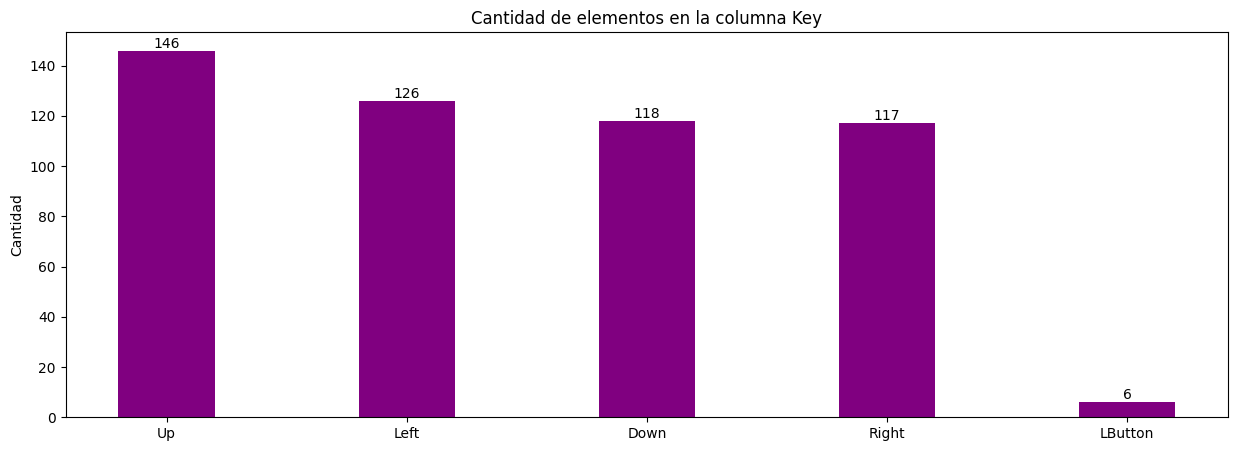

In [25]:

display(HTML(html_h4('Analizo los datos en la característica target del conjunto de datos  ', 'black')))

# creo la figura 
fig = plt.figure(figsize = (15, 5))
 
# calculo la cantidad de datos de cada elemento en la columna Key
counts = datosEEGTotal_csv['Key'].value_counts()

# creo el el barplot
plt.bar(counts.index, counts.values, color ='purple', width = 0.4)

# se muestra por cada dato el total de cada elemento
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Añadir etiquetas
#plt.xlabel('Key')
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos en la columna Key')

# Mostrar el gráfico
plt.show()

display(HTML(html_h5('Los datos parecen balanceados excepto LButton que parece que deberia integrarse con Left. Los datos perdidos no se muestran pero habria que darles valor, en principio no deberian ser ningún valor o algo como Nothing o Center', 'blue')))



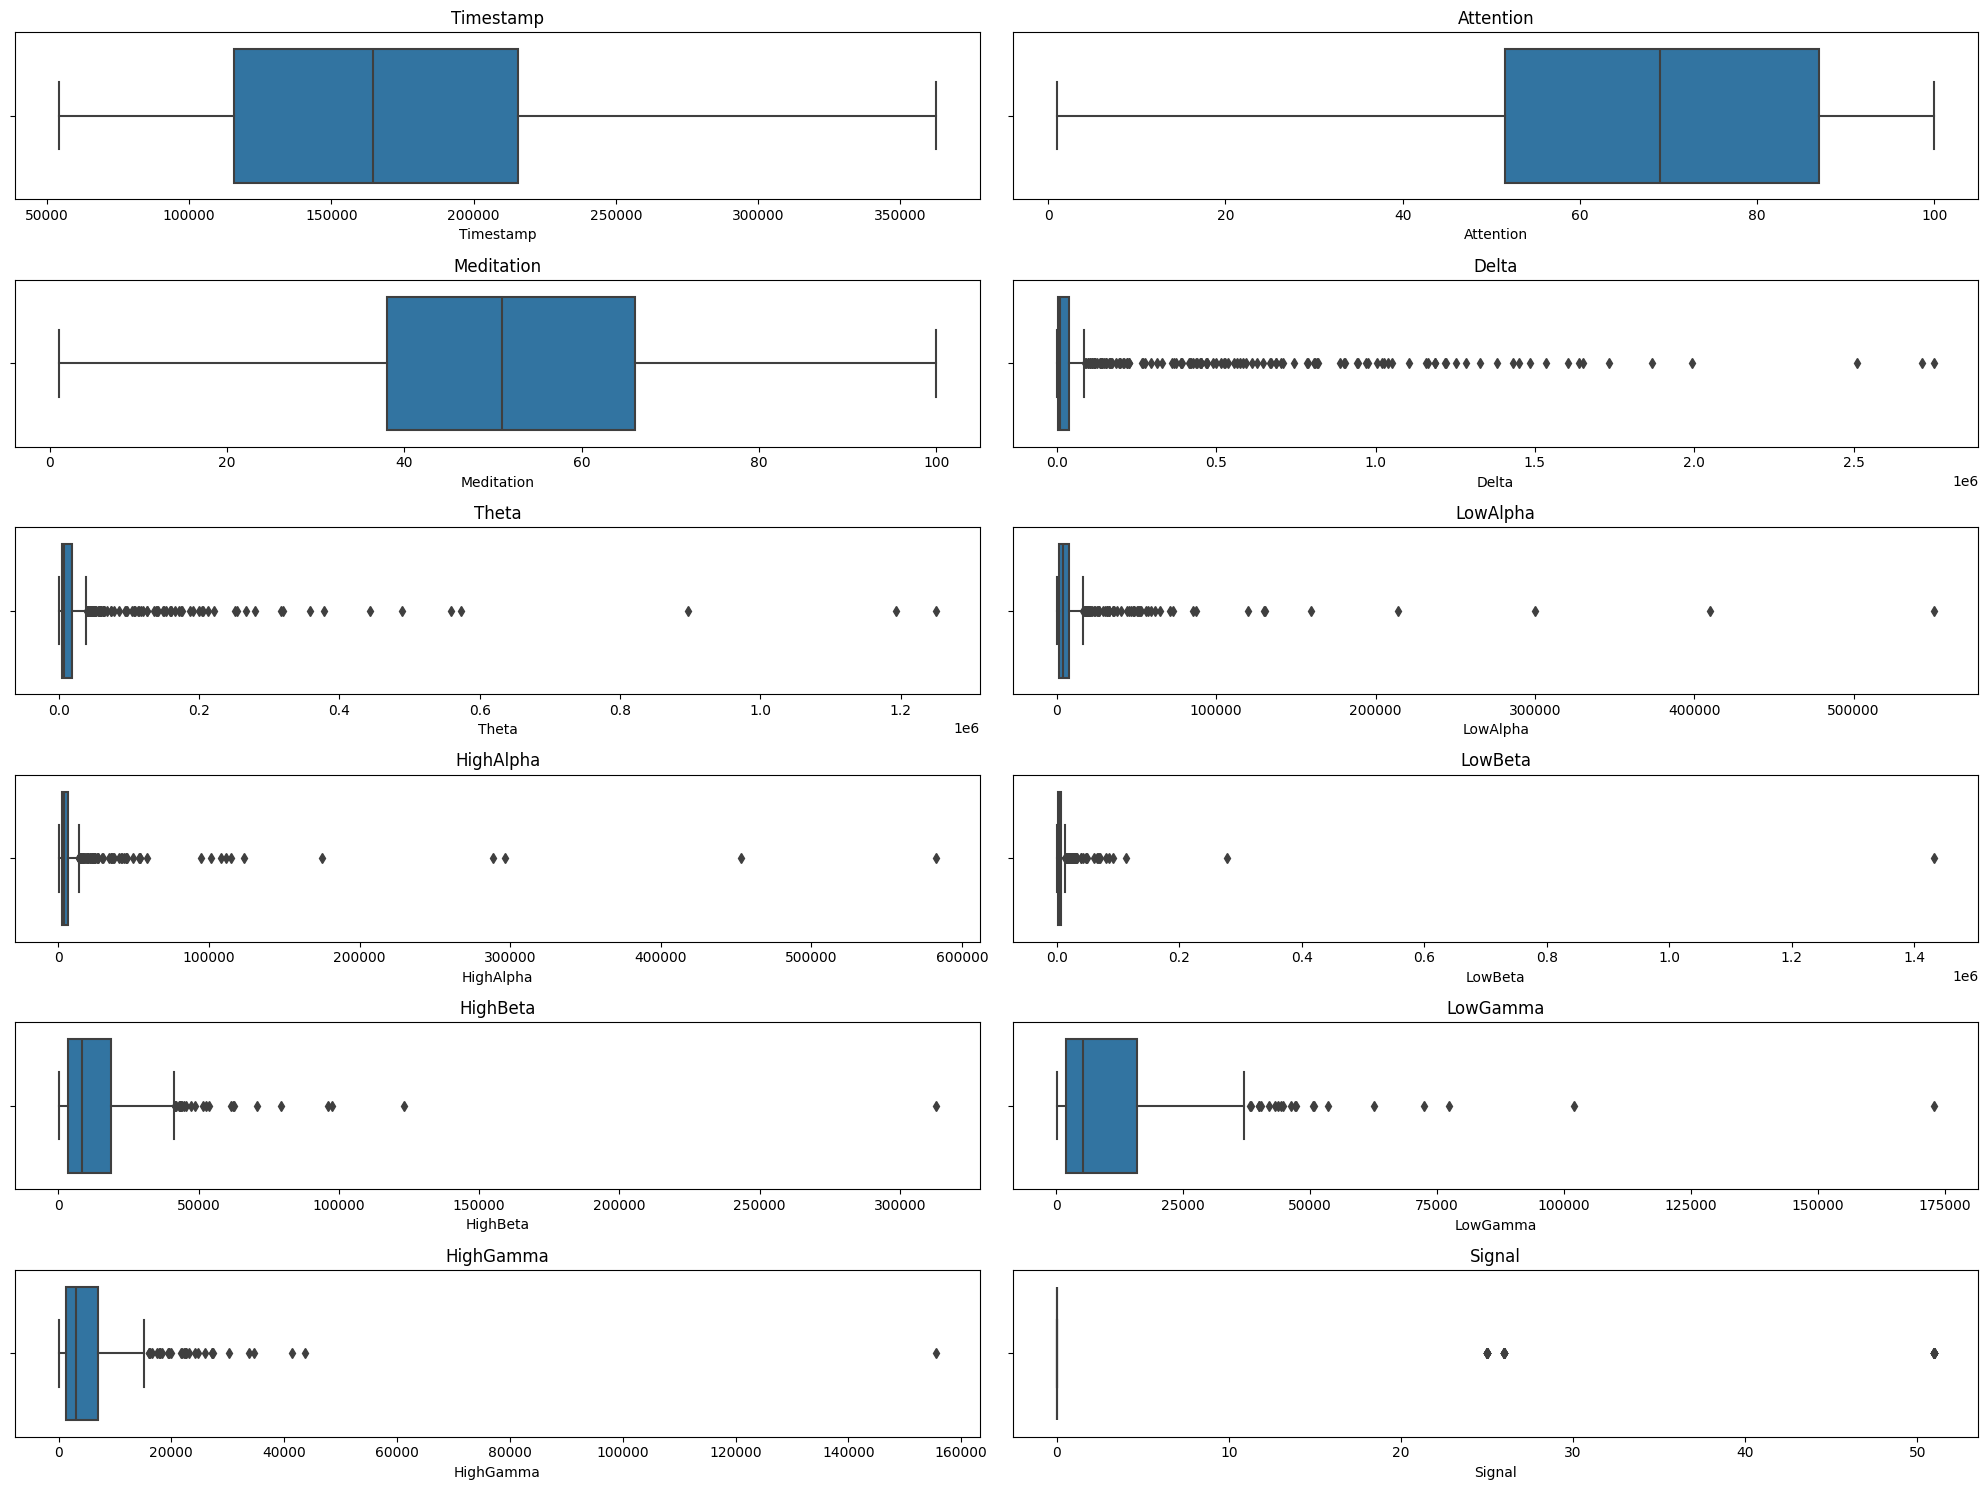

In [13]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

display(HTML(html_h4('Analizo de que manera esta la distribución de datos en su cuartil dentro de cada caracterictica del conjunto de datos  ', 'purple')))

# Filtro el DataFrame para dejar fuera la columna Key
datosEEGTotal_csv_box = datosEEGTotal_csv.drop(['Key'], axis=1)

# Calculo el número de filas necesarias para mostrar dos boxplots por fila para que la impresion no sea muy larga
num_cols = len(datosEEGTotal_csv_box.columns)
num_rows = (num_cols) // 2

# Defino el tamaño de la figura
plt.figure(figsize=(20, 15))

# Itero sobre cada columna del DataFrame filtrado
for i, column in enumerate(datosEEGTotal_csv_box.columns):
    # Creo un subplot para cada columna
    plt.subplot(num_rows, 2, i + 1)
    
    # un boxplot para cada columna
    sns.boxplot(data=datosEEGTotal_csv_box, x=column)
    
    # título como el nombre de la columna
    plt.title(column)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()



In [14]:
display(HTML(html_h5('Se observa que en las sondas Atention y Meditacion los datos parecen estar acotados, en Delta, Theta, Alpha, Beta, Gamma sus cuartiles son cercanos a cero y aparecen posibles outliners con datos muy separados del resto, Signal su cuartil es cero, por lo tanto, seria uno de los datos que se podrian obviar al no aportar nada al analisis  ', 'blue')))

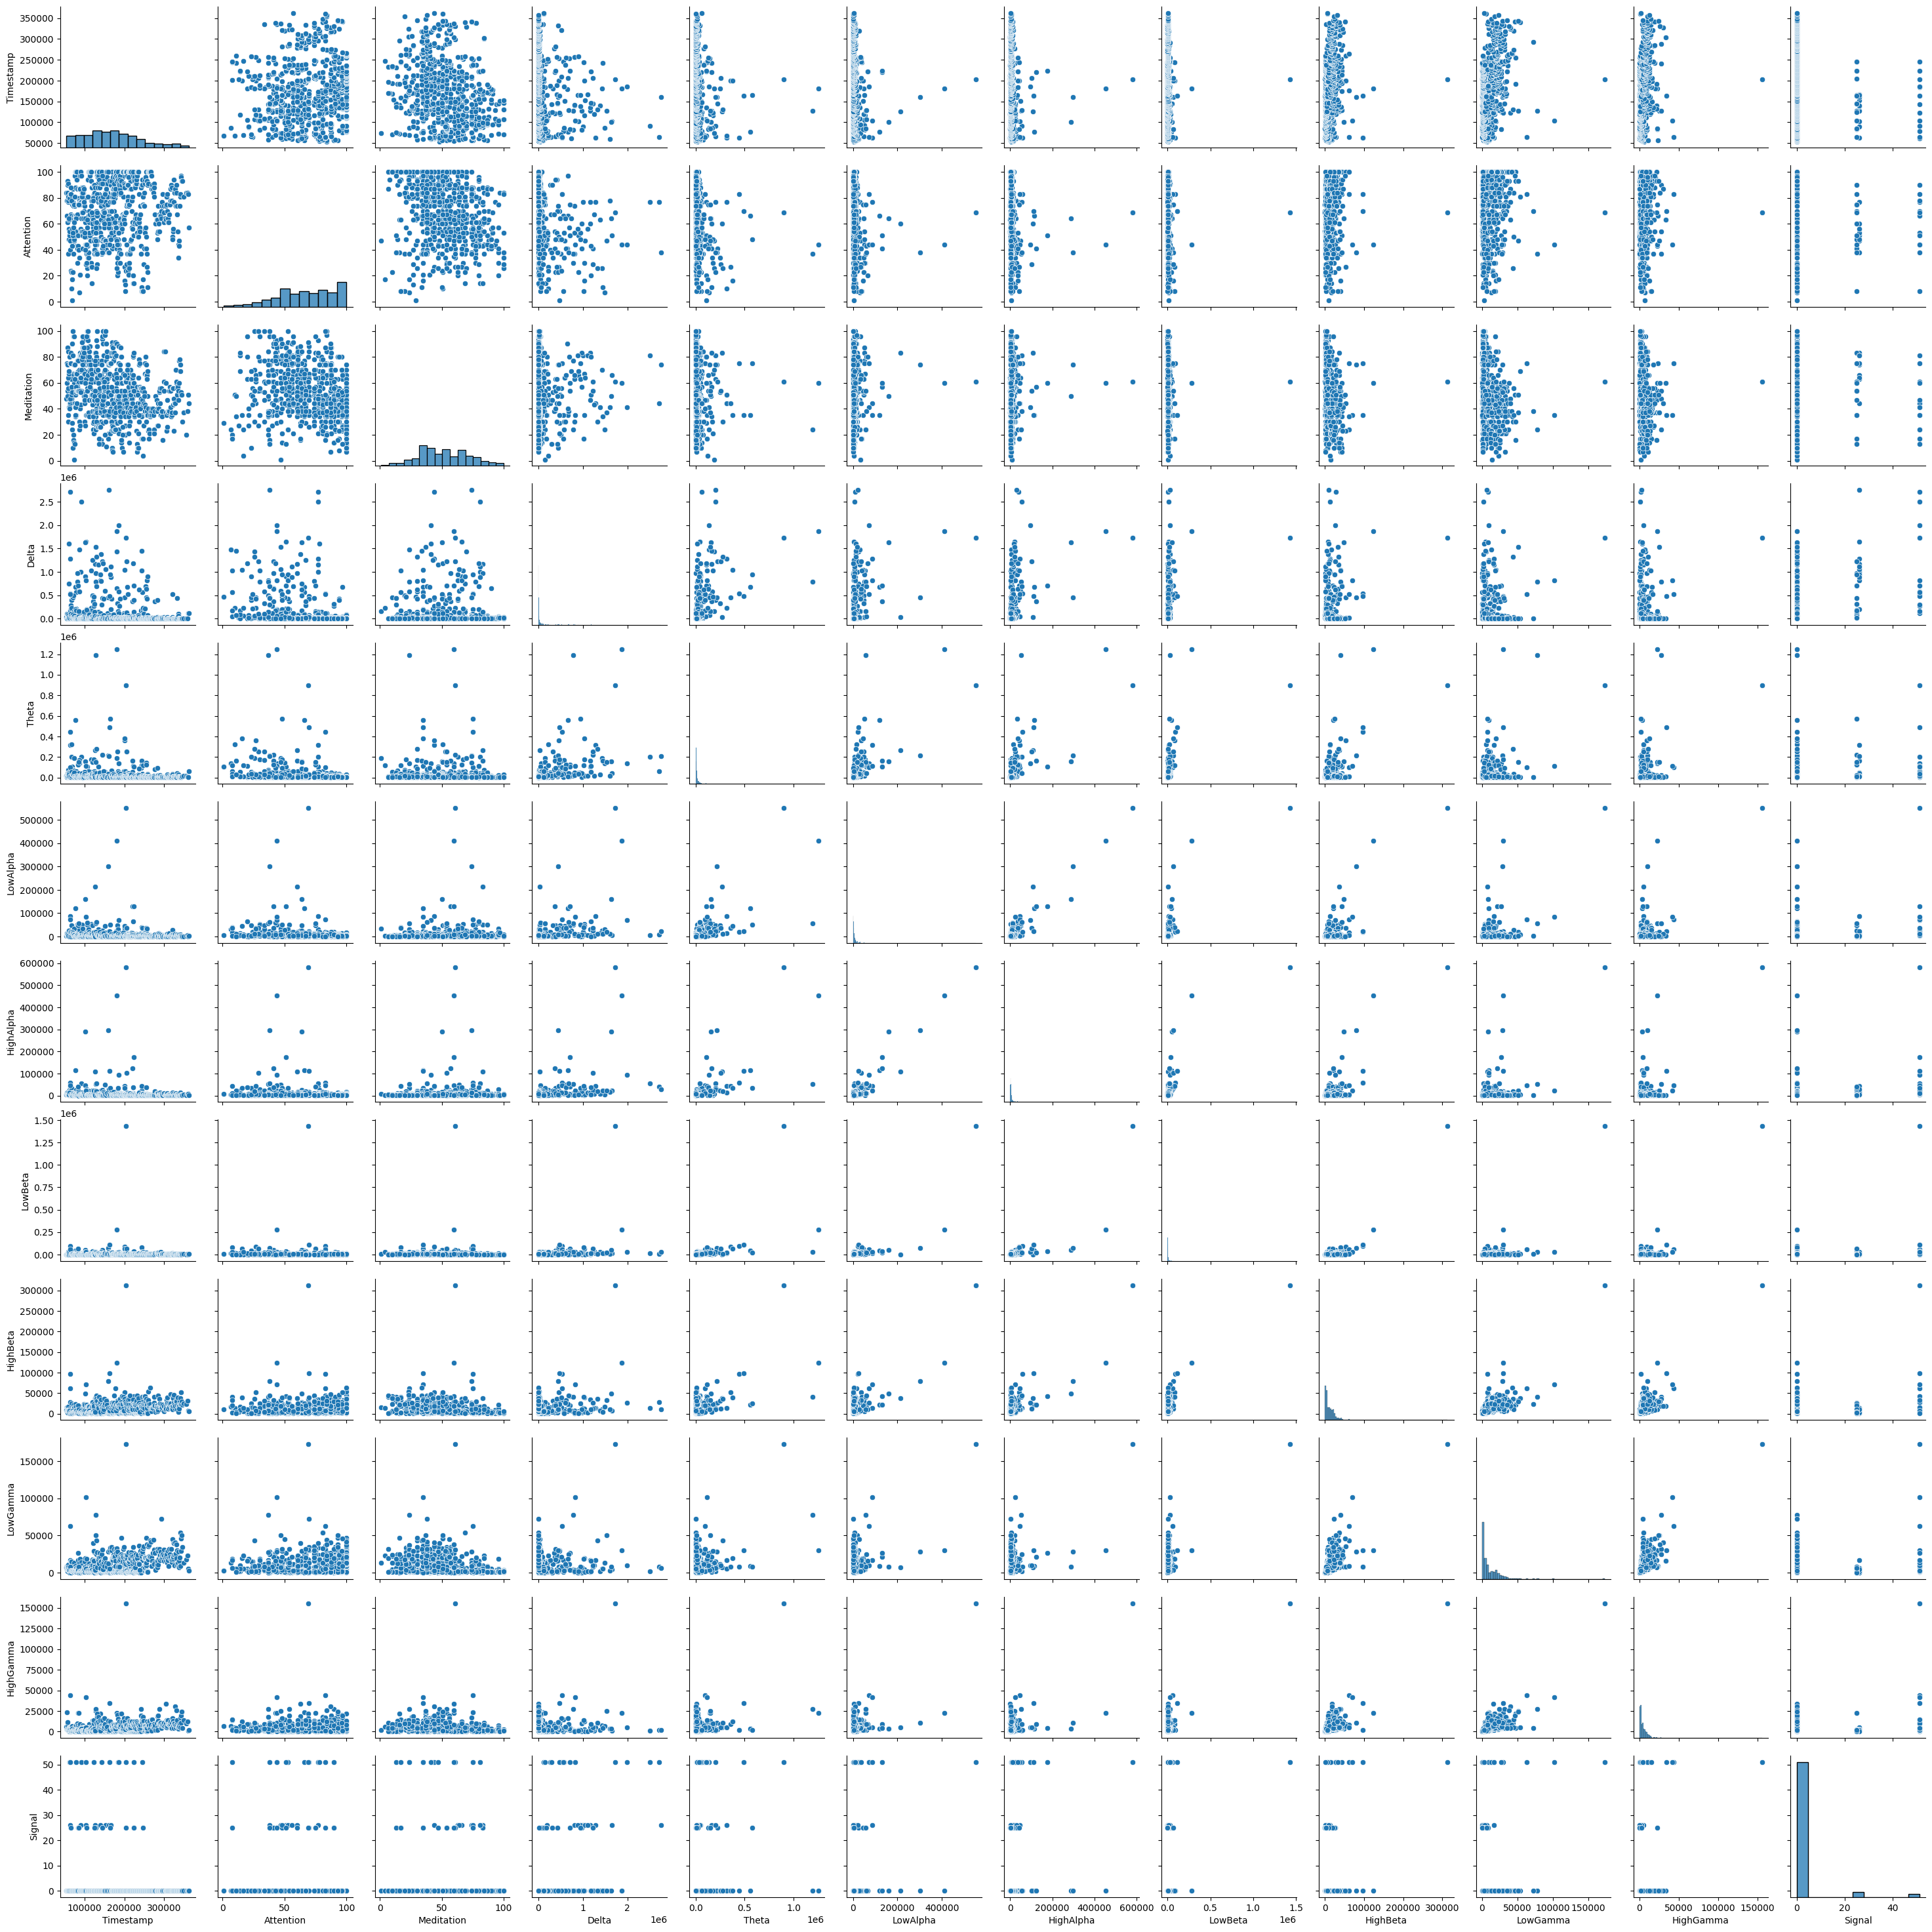

In [26]:
#https://www.codetodevs.com/correlacion-variables-pairplot-seaborn/
display(HTML(html_h4('Muestro los graficos de dispersión de los datos inicialmente', 'purple')))

sns.pairplot(datosEEGTotal_csv)


Evaluación de normalidad de los datos originales:


Análisis de la columna: Timestamp


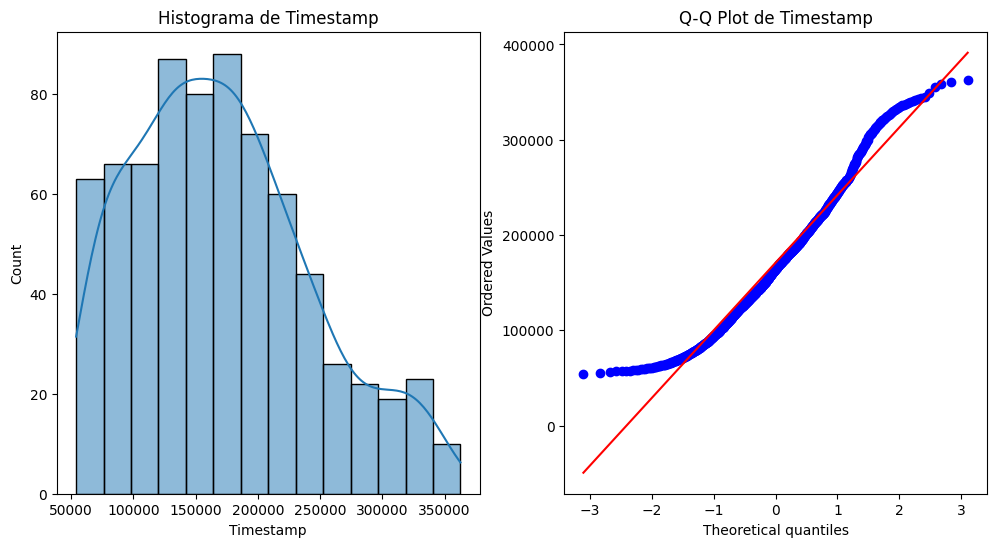

Prueba de Shapiro-Wilk
Estadístico: 0.9658275246620178
p-valor: 5.56074023633224e-12




Análisis de la columna: Attention


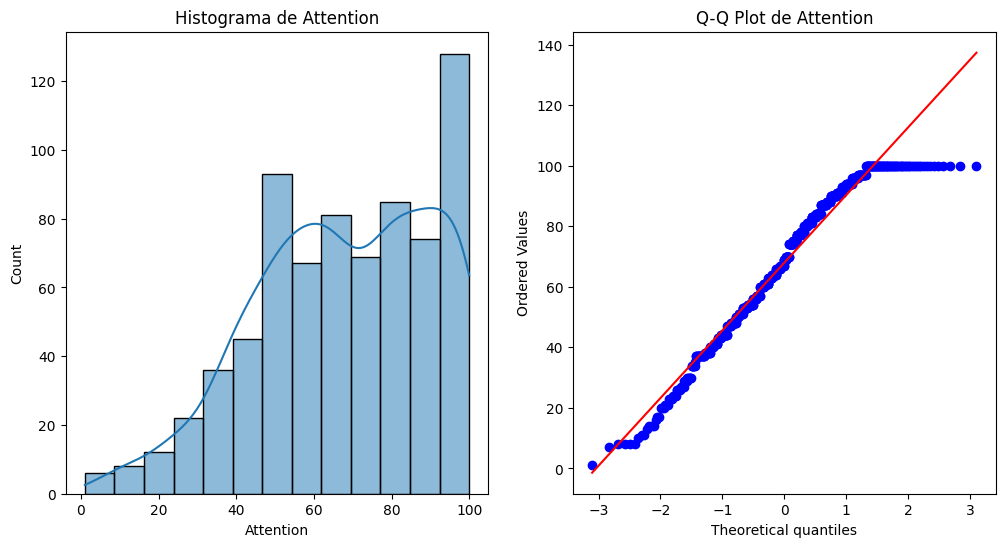

Prueba de Shapiro-Wilk
Estadístico: 0.9594356417655945
p-valor: 2.7940098693869653e-13




Análisis de la columna: Meditation


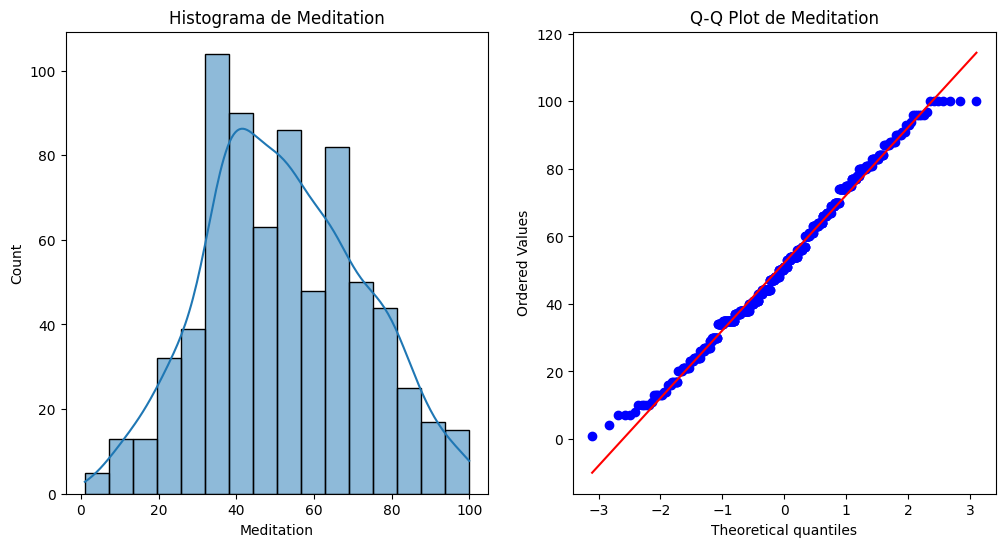

Prueba de Shapiro-Wilk
Estadístico: 0.9907721281051636
p-valor: 0.00016396564024034888




Análisis de la columna: Delta


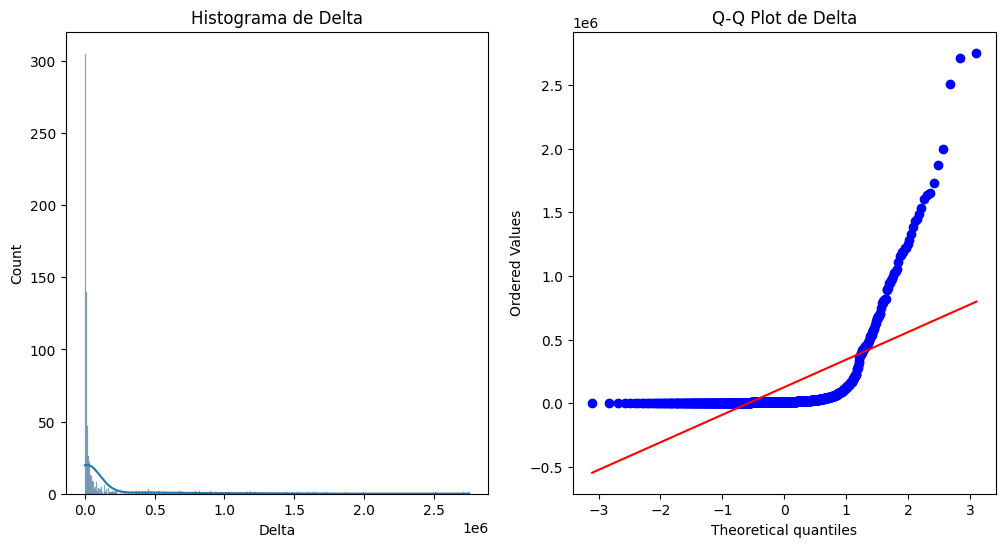

Prueba de Shapiro-Wilk
Estadístico: 0.4154454469680786
p-valor: 3.3911422836660573e-43




Análisis de la columna: Theta


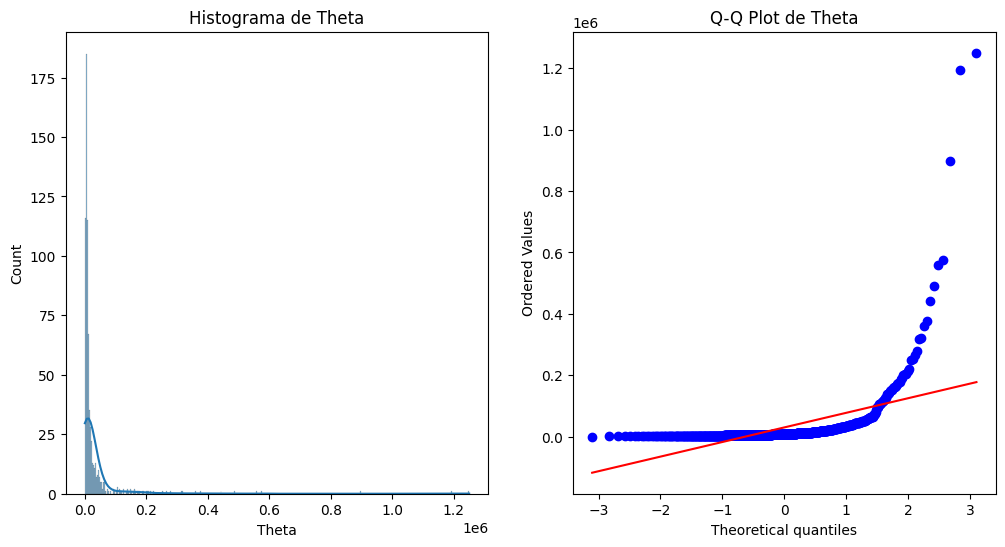

Prueba de Shapiro-Wilk
Estadístico: 0.275526225566864
p-valor: 0.0




Análisis de la columna: LowAlpha


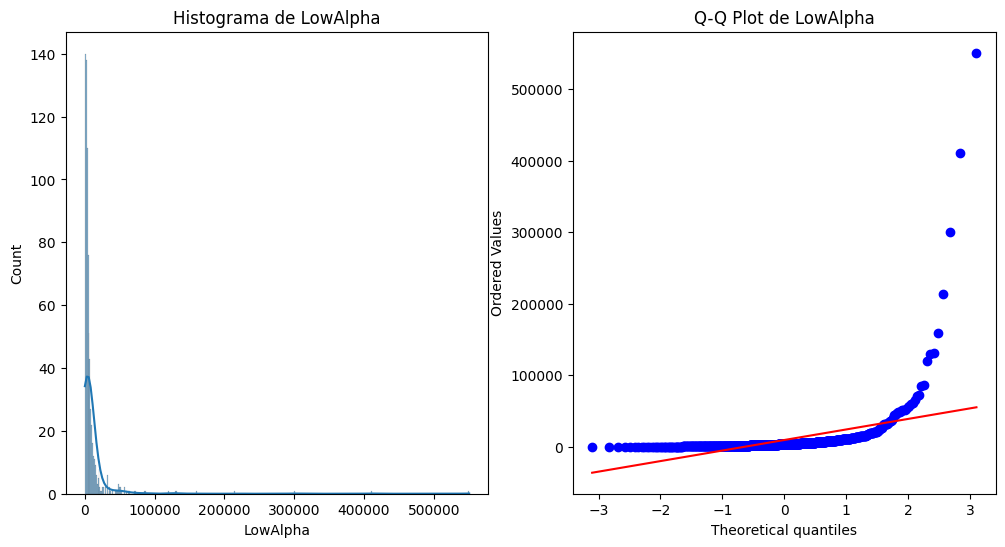

Prueba de Shapiro-Wilk
Estadístico: 0.2193107008934021
p-valor: 0.0




Análisis de la columna: HighAlpha


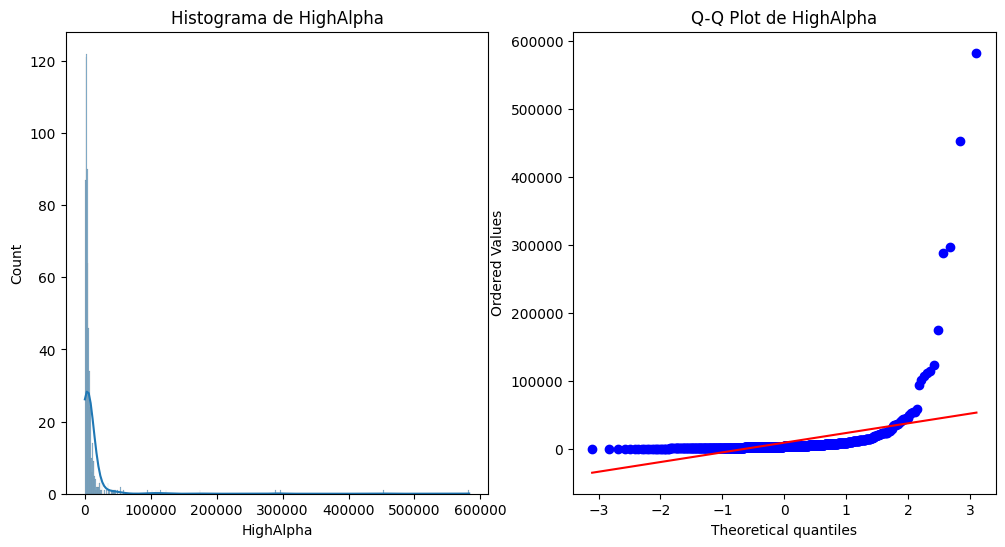

Prueba de Shapiro-Wilk
Estadístico: 0.18210268020629883
p-valor: 0.0




Análisis de la columna: LowBeta


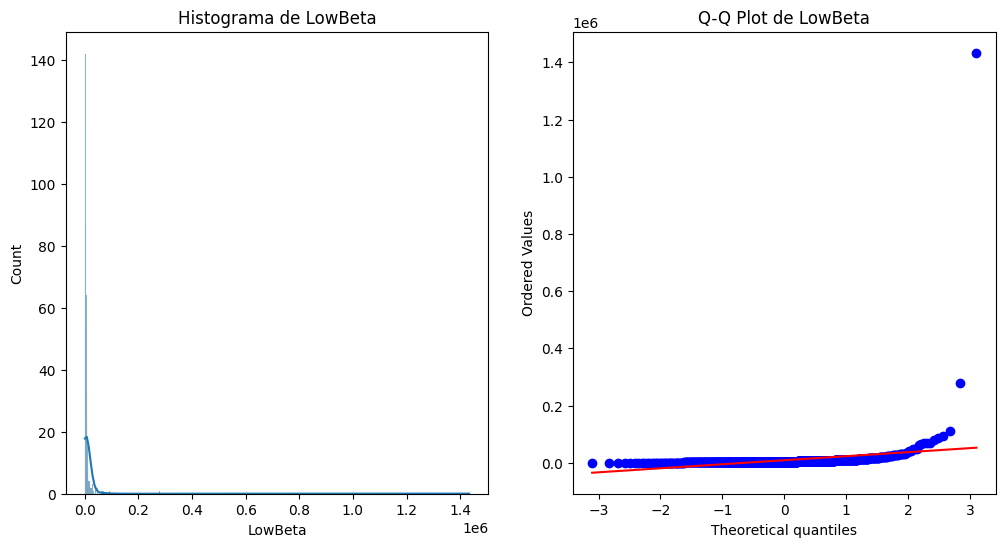

Prueba de Shapiro-Wilk
Estadístico: 0.06999409198760986
p-valor: 0.0




Análisis de la columna: HighBeta


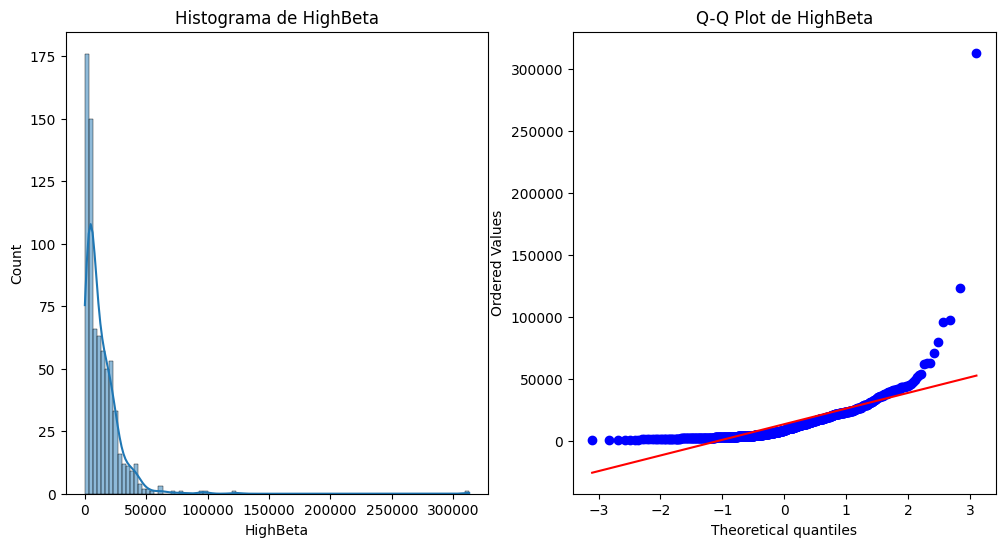

Prueba de Shapiro-Wilk
Estadístico: 0.5434117317199707
p-valor: 1.1739405910850442e-39




Análisis de la columna: LowGamma


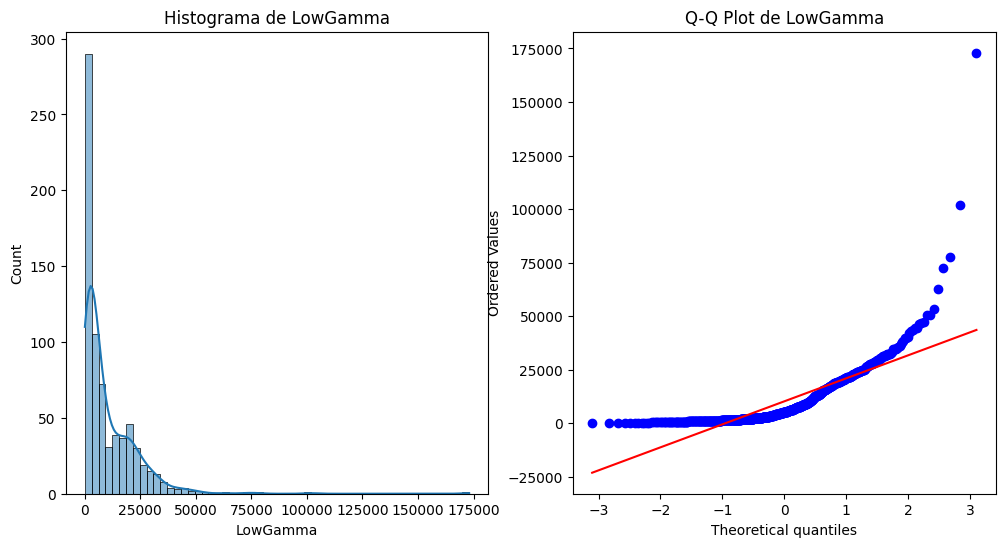

Prueba de Shapiro-Wilk
Estadístico: 0.6755427718162537
p-valor: 5.070454130270517e-35




Análisis de la columna: HighGamma


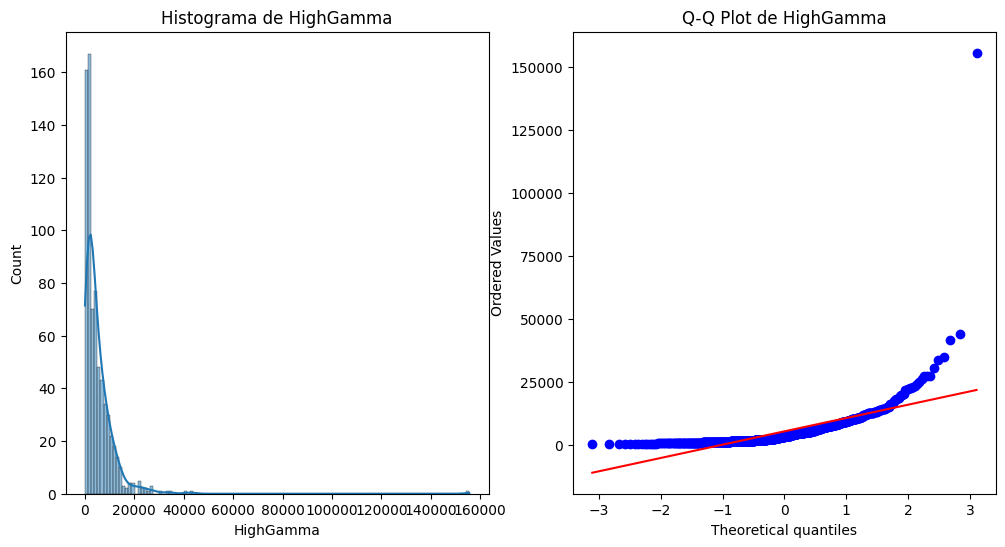

Prueba de Shapiro-Wilk
Estadístico: 0.465118944644928
p-valor: 6.611326154684487e-42




Análisis de la columna: Signal


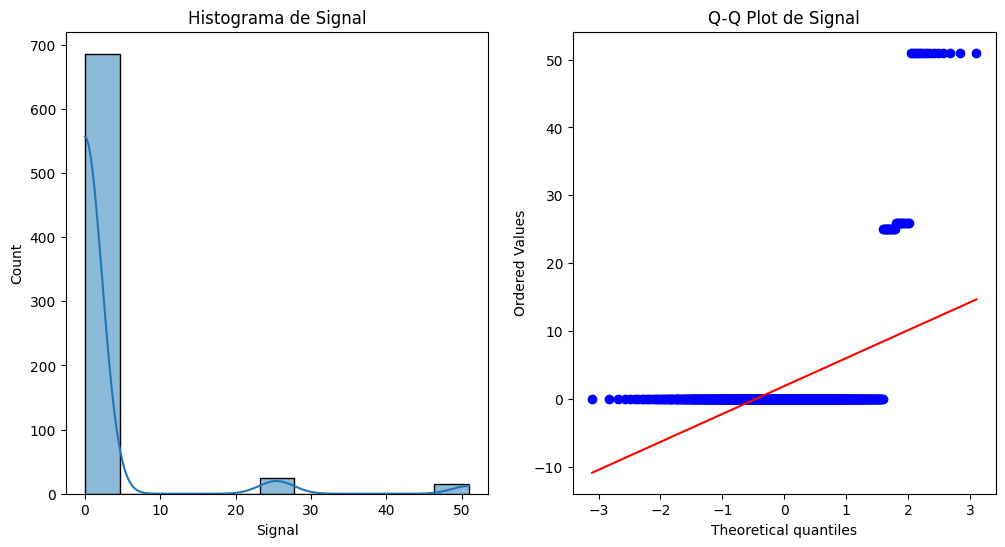

Prueba de Shapiro-Wilk
Estadístico: 0.23332440853118896
p-valor: 0.0


In [27]:


display(HTML(html_h4('Se muestra el analisis por cada carcteristica, de la normalidad de los datos en cada una de ellas. ', 'purple')))



datos_histograma = datosEEGTotal_csv.drop(['Key'], axis=1)

# Función para evaluar normalidad
def evaluar_normalidad(datos_histograma, columnas):
    for columna in columnas:
        print('')
        print(f'\nAnálisis de la columna: {columna}')
        
        # Histograma
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(datos_histograma[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(datos_histograma[columna], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot de {columna}')
        plt.show()
        
        # Prueba de Shapiro-Wilk
        stats_shapiro, p_value = stats.shapiro(datos_histograma[columna])
        print('Prueba de Shapiro-Wilk')
        print('Estadístico:', stats_shapiro)
        print('p-valor:', p_value)
        if p_value > 0.05:
            display(HTML(html_h4('La muestra parece gaussiana', 'purple')))
        else:
            display(HTML(html_h4('La muestra no parece gaussiana', 'purple')))

# Evaluar normalidad de los datos originales
print("Evaluación de normalidad de los datos originales:")
evaluar_normalidad(datos_histograma, datos_histograma.columns)


